## 01 Introduction

#### Doing it with Python ...

In [1]:
# Doing it the `pythonic` way
from typing import Union, List

NumericalType = Union[float, int]

def dot_product(x: List[NumericalType], y: List[NumericalType]) -> float:
    dot_product = 0.0
    for xi, yi in zip(x, y):
        dot_product += xi * yi
    return dot_product

In [2]:
x = list(range(1000))
y = list(range(1000))

print(x[:10], y[:10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
dp = dot_product(x, y)
print(dp)

332833500.0


In [4]:
%%timeit
dp = dot_product(x, y)

166 µs ± 4.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### ... and now with Numpy

In [12]:
# Doing it the `numpy` way
import numpy as np

x_np = np.array(x)
y_np = np.array(y)

print(x[:10], y[:10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [13]:
dp_np = (x_np * y_np).sum()
dp_np

332833500

In [14]:
%%timeit
dp_np = (x_np * y_np).sum()

22.5 µs ± 261 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
%%timeit
# Sometimes, you can go even faster, if there is a built-in function available
np.dot(x_np, y_np)

3.46 µs ± 74.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [17]:
print(np.dot(x_np, y_np))

332833500


#### Fixed data types
- Remember, that Python's lists can store arbitrary types. If you iterate over a list, Python has to infer the datatype for each element in order to check which operations can applied to the element
- ndarray instead have a fixed datatype, allowing only to store elements of the same type, and thereby eliminating the need to perform type checking for each element

In [18]:
# The np.array function takes in a (potentially nested) list of numbers and converts it into a ndarray

array = np.array([[1, 2, 3.5], [1, 3, 4]])
print("Type of the array:", type(array))
print("Datatype of the content of the array:", array.dtype)
print(array)

Type of the array: <class 'numpy.ndarray'>
Datatype of the content of the array: float64
[[1.  2.  3.5]
 [1.  3.  4. ]]


#### Vectorized operations
- In contrast to lists arrays have a fixed size. Once created they can't be expanded or reduced
- This allows numpy to efficiently apply element-wise operations, as long as both arrays have the same shape

In [19]:
a, b = np.array([1, 2, 3]), np.array([4, 5, 6])
a + a, a * b, a - b

(array([2, 4, 6]), array([ 4, 10, 18]), array([-3, -3, -3]))

In [20]:
a = np.array([1, 2, 3])
b = a * 2
b

array([2, 4, 6])

In [21]:
c = a**2
c

array([1, 4, 9], dtype=int32)

## 02 Numpy Basics

#### Creating ndarrays

In [23]:
#creation from existing (nested) lists
my_list = [[1, 2], [3, 4]]
my_array = np.array(my_list)
print(my_array)

[[1 2]
 [3 4]]


In [24]:
#creating arrays with fixed content
zero_array = np.zeros(shape=(2, 2))
print(zero_array)

ones_array = np.ones((2, 2))
print(ones_array)

constant_array = np.full(shape=(2, 2), fill_value=-100)
print(constant_array)

[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[[-100 -100]
 [-100 -100]]


In [25]:
#creating arrays with consecutive content
running_array = np.arange(0, 9)
print(running_array)

evenly_spaced_array = np.linspace(0, 1, num=5)
print(evenly_spaced_array)

[0 1 2 3 4 5 6 7 8]
[0.   0.25 0.5  0.75 1.  ]


In [26]:
#creating arrays with random numbers
rand_normal_array = np.random.randn(10000)
print(rand_normal_array.shape)
print("Mean:", rand_normal_array.mean(), "Std:", rand_normal_array.std())

rand_integer_array = np.random.randint(0, 2, (10))
print(rand_integer_array)

(10000,)
Mean: 0.0003453669868317633 Std: 1.0008468396003896
[1 1 1 0 1 0 0 0 1 1]


#### ndarray: dimensions
- Creating a ndarray from a nested list, gives you a multidimensional arrays. In theory, ndarrays can have as many dimensions as you like

In [29]:
table = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
print("Number of dimensions:", table.ndim)
print("Shape of the array:", table.shape) #(zeilen, spalten)

Number of dimensions: 2
Shape of the array: (2, 3)


#### ndarray: indexing

In [40]:
#we'll creat a 3dim array, each dimension having a length of 3 entries
array = np.arange(27).reshape(3, 3, 3)
print(array.ndim)
print(array.shape)
print(array)

3
(3, 3, 3)
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


In [41]:
# Get the first element across all dimensions
print(array[0, 0, 0])

# Get the first "matrix"
print(array[0, :, :])

# Get the last row vector of the second matrix
print(array[1, -1, :])

0
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[15 16 17]


#### Quiz time

In [42]:
print(array)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


In [43]:
array[0, 1, 0]

3

In [44]:
array[0, 2, 0]

6

In [45]:
array[0, 1, 1]

4

In [47]:
array[-1, :2, 0]

array([18, 21])

In [48]:
array[:, :, :]

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

- Schema Arrayzugriff: Array - Zeile - Spalte

#### ndarray: masking
- Masking allows you to operate only those values in an array, which fulfill a certain condition

In [49]:
array = np.random.randint(0, 100, (100, 100))
smaller_fifty_mask = array < 50
print(smaller_fifty_mask)
print(smaller_fifty_mask.shape)

[[False  True  True ... False  True False]
 [ True  True False ...  True  True  True]
 [False  True  True ...  True  True  True]
 ...
 [False  True False ... False False False]
 [False False  True ...  True False  True]
 [ True  True False ...  True False  True]]
(100, 100)


In [50]:
#retrieving
values_smaller_than_fifty = array[smaller_fifty_mask]
print(values_smaller_than_fifty)
print(values_smaller_than_fifty.shape)

[31 45 42 ... 16  4  3]
(4949,)


In [52]:
#replace operations
array[smaller_fifty_mask] = 0
print(array)

[[59  0  0 ... 54  0 59]
 [ 0  0 54 ...  0  0  0]
 [67  0  0 ...  0  0  0]
 ...
 [63  0 67 ... 97 81 86]
 [83 78  0 ...  0 75  0]
 [ 0  0 97 ...  0 97  0]]


#### ndarray: reshaping
- changing the shape of an existing array = reshaping
- the number of entries in the newly created array has to match the number of entries in the existing array

In [57]:
vector = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print(vector)
print("Orig shape:", vector.shape)
print("No. of entries:", vector.size)

matrix = vector.reshape(2, 4)
print(matrix)
print("New shape:", matrix.shape)
print("No. of entries:", matrix.size)

tuples = vector.reshape(-1, 2) #-1 steht für das minimum das möglich ist also eigentlich nichts anderes als (4,2)
print(tuples)
print("New shape:", tuples.shape)
print("No. of entries:", tuples.size)

[1 2 3 4 5 6 7 8]
Orig shape: (8,)
No. of entries: 8
[[1 2 3 4]
 [5 6 7 8]]
New shape: (2, 4)
No. of entries: 8
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
New shape: (4, 2)
No. of entries: 8


#### Quiz

In [60]:
cube = np.arange(27).reshape(3, 3, 3)
#print(cube)
arr = cube.reshape(-1)
arr.shape
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

#### ndarray: computations
- easier computations thanks to special functions in numpy like abs(), square(), exp(), mean() etc.

In [62]:
x = np.random.randint(-10, 0, (10,))

print(np.abs(x))
print(np.square(x))
print(np.exp(x))
print("And many more!")

[2 7 3 2 4 8 9 5 2 7]
[ 4 49  9  4 16 64 81 25  4 49]
[1.35335283e-01 9.11881966e-04 4.97870684e-02 1.35335283e-01
 1.83156389e-02 3.35462628e-04 1.23409804e-04 6.73794700e-03
 1.35335283e-01 9.11881966e-04]
And many more!


In [63]:
print("Addition")
print(x + x)
print(np.add(x, x))

print("Multiplication")
print(x * x)
print(np.multiply(x, x))

print("Divide")
print(x / x)
print(np.divide(x, x,))

Addition
[ -4 -14  -6  -4  -8 -16 -18 -10  -4 -14]
[ -4 -14  -6  -4  -8 -16 -18 -10  -4 -14]
Multiplication
[ 4 49  9  4 16 64 81 25  4 49]
[ 4 49  9  4 16 64 81 25  4 49]
Divide
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Aggregation Funcions: Numpy for Statistics

In [64]:
data = np.array([1, 2, 3])
data.mean(), data.std()

(2.0, 0.816496580927726)

In [66]:
data = np.arange(27).reshape(3, 3, 3)
data.mean(), data.reshape(-1).mean() #same result independent of its shape

(13.0, 13.0)

#### Example:
Suppose you are an erratic billionaire, who just bought a social media platform, and now quickly has to decrease operational costs, to satisfy your co-financiers.

To decide who is due for layoff, your HR department provides you a dataset of all your programmers and their daily amounts of lines of code written for the past 30 days.

In [67]:
# Shape [n_programmers, n_days]
programmers_loc = np.random.randint(250, 500, size=(600, 30))
decay = np.arange(30) * np.random.randint(0, 20, size=(30,))
programmers_loc -= decay

print("Average number of lines of code written:", programmers_loc.mean())

Average number of lines of code written: 229.08833333333334


But, just computing the mean, doesn't help you to decide whom to fire. You'll need the average number of lines written per employee.

You can compute these values by explicitly stating an axis along which the aggregation function has to operate. In numpy axes (or dimensions as we called them earlier) are indexed numerically

Our dataset has the shape [n_programmers, n_days], so to compute the average number of lines of code written in the past 30 days we have to aggreate all values of the second dimension (index=1):

In [68]:
average_loc_per_employee = programmers_loc.mean(axis=1)
print(average_loc_per_employee.shape)

(600,)


Doing so, returns as another ndarray with 600 entries, each representing the mean over 30 days.

Using another aggregation function argmin which returns the index of the smallest element in an array / per dimension, you can now easily find the most unproductive programmer.

In [69]:
np.min(average_loc_per_employee), np.argmin(average_loc_per_employee)

(196.0, 429)

Obviously, it's possible to perform those kinds of operations along all dimensions. Computing the mean, along the first axis (index=0), would return you the average number of LoC over that past 30 days:

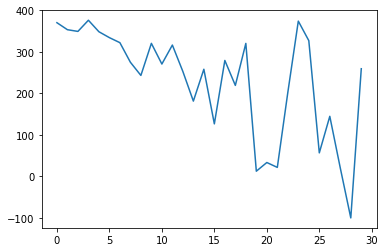

In [72]:
import matplotlib.pyplot as plt
plt.plot(programmers_loc.mean(axis=0))

*side note: methods vs. functions*
- Most aggregation operations are available in two "flavors", either as function accessible via the np object, or via the concrete ndarray itself

In [73]:
np.mean(programmers_loc), programmers_loc.mean()

(229.08833333333334, 229.08833333333334)

## 03 Broadcasting

#### ndarray: broadcasting

In [74]:
data1 = np.random.randint(0, 10, size=(2, 2 ,2))
data2 = np.ones((2, 2, 2), dtype=np.int64)

print(data1)

print(data1 + data2)

[[[6 7]
  [1 7]]

 [[5 7]
  [3 1]]]
[[[7 8]
  [2 8]]

 [[6 8]
  [4 2]]]


In [75]:
#arithmetic operations
print(data1 + 1)

[[[7 8]
  [2 8]]

 [[6 8]
  [4 2]]]


In [76]:
matrix = np.arange(9).reshape(3, 3)
print(matrix)

row_vec = np.array([1, -1, 5]) #adds value in brackets to every line in our array above
print(row_vec)
print("matrix + row_vec=\n", matrix + row_vec)

col_vec = np.array([[1], [-1], [5]]) #adds value in brackets to every line in our array above
print(col_vec.shape)
print(col_vec)
print("matrix + col_vec=\n", matrix + col_vec)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[ 1 -1  5]
matrix + row_vec=
 [[ 1  0  7]
 [ 4  3 10]
 [ 7  6 13]]
(3, 1)
[[ 1]
 [-1]
 [ 5]]
matrix + col_vec=
 [[ 1  2  3]
 [ 2  3  4]
 [11 12 13]]


To perform those operations on ndarrays with mixed dimensionality, numpy uses broadcasting to automatically adjust the dimensions of the array with fewer dimensions, by padding it to the right size.
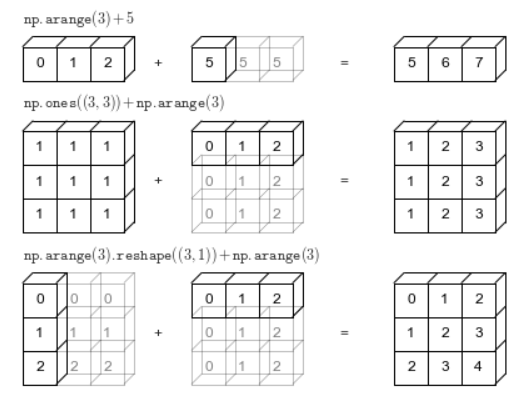

To successfully perform broadcasting some constraints on the shape and size of the arrays have to be fulfilled:

In [77]:
for dim_a, dim_b in zip(a.shape[::-1], b.shape[::-1]):
    if not (1 in (dim_a, dim_b) or dim_a == dim_b):
        raise ValueError("operands could not be broadcast together")

#### Broadcasting Example: convert rgb image to grayscale image

<class 'numpy.ndarray'>
Shape of the picture (512, 512, 3)


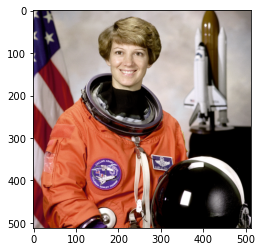

In [79]:
from skimage import data

picture = data.astronaut()
print(type(picture))
print("Shape of the picture", picture.shape)

plt.imshow(picture)
plt.show()

We, can see that the picture has a spatial resolution of 512 * 512 pixels.

The picture follows the RGB model so each pixel is described by the amount of red, green and blue color.

The channels make up the last dimension of the picture.

Using indexing it is easily possible to look at each channel independently:

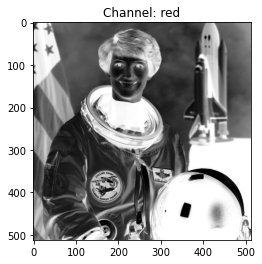

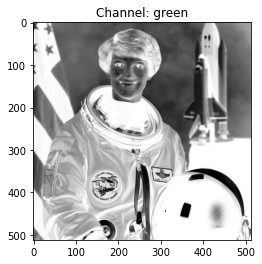

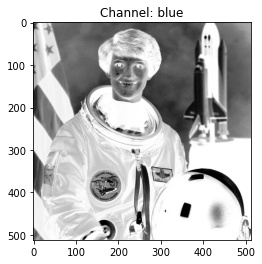

In [80]:
channel_map = {0: "red", 1: "green", 2: "blue"}
for channel_index in range(picture.shape[2]):
    channel_name = channel_map[channel_index]
    plt.imshow(picture[:, :, channel_index], cmap="Greys")
    plt.title(f"Channel: {channel_name}")
    plt.show()

The RGB color model is an additive one. By adding the maximum amount of all three basic colors we'll receive the color white.

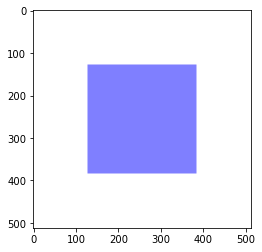

In [81]:
white = np.full((512, 512, 3), 255)
white[128:384, 128:384, :] = [127, 127, 255]
plt.imshow(white)
plt.show()

Vice versa by not adding any amount of all colors our pixel will be black. Grayscale images do not encode any color and just represent the amount of light visible in the picture.

To create a grayscale version of an RGB-image we have to compute the amount of light, using the following formula: 

*Y=0.2126R+0.7152G+0.0722B*

This is effectively a weighted sum over all three channels of the image.

Since we want to perform this operation for all 262144 pixels in the image broadcasting comes in naturally:

First pixel in original image [154 147 151]
First pixel with scaled rgb values [ 32.725  105.1638  10.8871]
Grayscaled image shape (512, 512)


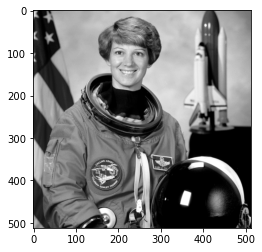

In [83]:
# Create an array with rgb to grayscale weight
rgb_grayscale_weights = np.array([0.2125, 0.7154, 0.0721])

print("First pixel in original image", picture[0, 0, :])

# First, we use broadcasting to scale all values in the RGB channels
scaled_rgb_picture = rgb_grayscale_weights * picture
print("First pixel with scaled rgb values", scaled_rgb_picture[0, 0, :])

# To receive the gray values, just sum over the channels for each pixel
grayscaled_picture = scaled_rgb_picture.sum(axis=2)

print("Grayscaled image shape", grayscaled_picture.shape)
plt.imshow(grayscaled_picture, cmap="gray")

plt.show()

Further reading: https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html